# American Census

In [63]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn as sns


## Global config

In [64]:
# Data config
path_to_csv = "adult.csv"


## Load data

In [65]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")


**Create a binary classifier that can predict whether a person makes over 50k a year using the dataset.**
## Helpers

# TODO


## Data exploration
1. What are the features and target variables of the dataset?
2. What is the right performance metric to use for this dataset? (Explain)
3. Algorithmic bias: should we use race and sex features in the machine learning algorithms? Explain the arguments.

### Question 1
#### Income - target column

In [10]:
X_train.head()

,age,education-num,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,30,9.0,40,Private,HS-grad,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Female,United-States
1,77,10.0,6,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,United-States
2,44,12.0,50,Private,Assoc-acdm,Never-married,Prof-specialty,Unmarried,Black,Female,United-States
3,53,10.0,50,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
4,41,10.0,40,Federal-gov,Some-college,Married-civ-spouse,Transport-moving,Wife,White,Female,United-States


In [39]:
X_train.describe()

,age,education-num,hours-per-week
count,16280.000000,16040.00000,16280.000000
mean,38.600614,10.09414,40.392936
std,13.695138,2.55840,12.345950
min,17.000000,1.00000,1.000000
25%,28.000000,9.00000,40.000000
50%,37.000000,10.00000,40.000000
75%,48.000000,12.00000,45.000000
max,90.000000,16.00000,99.000000


In [40]:
X_train.isnull().sum()

age                  0
education-num      240
hours-per-week       0
workclass          936
education            0
marital-status       0
occupation        1181
relationship         0
race                 0
sex                  0
native-country     300
dtype: int64

c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

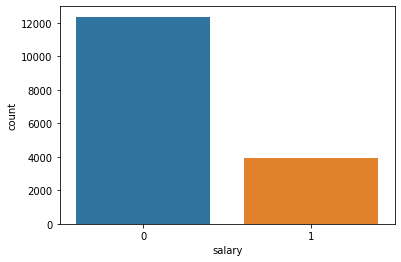

In [26]:
# TODO
sns.countplot(y_train.salary)
# There is a high imbalance in the output classes.


c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

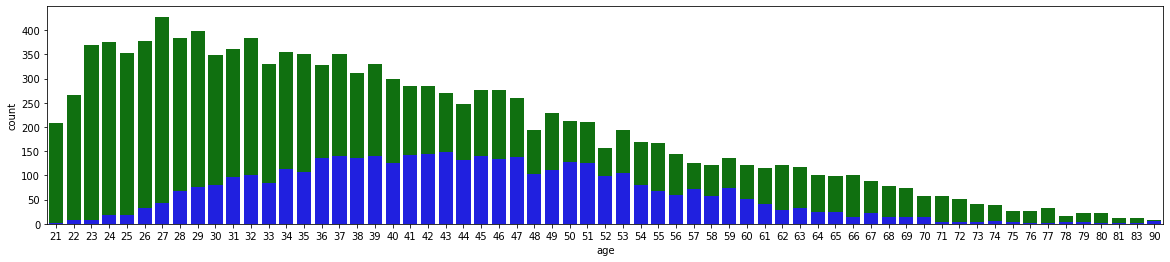

In [33]:
dims = (20,4)
fig, ax = pyplot.subplots(figsize=dims)
sns.countplot(X_train[y_train.salary == 0].age,color='green')
sns.countplot(X_train[y_train.salary == 1].age,color='blue')


c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num', ylabel='count'>

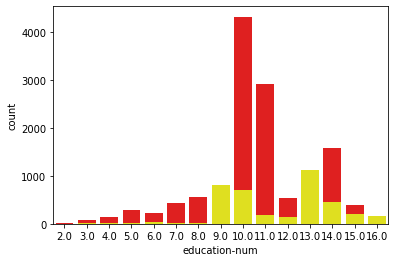

In [15]:
sns.countplot(X_train['education-num'][y_train.salary == 0],color='red')
sns.countplot(X_train['education-num'][y_train.salary == 1],color='yellow')

c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

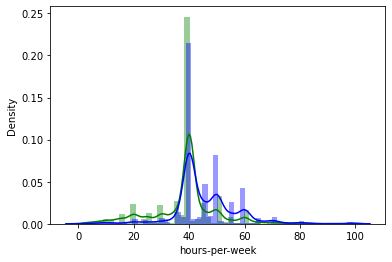

In [34]:
sns.distplot(X_train['hours-per-week'][y_train.salary == 0],color='green')
sns.distplot(X_train['hours-per-week'][y_train.salary == 1],color='blue')

In [35]:
X_train['workclass'].value_counts()

 Private             11352
 Self-emp-not-inc     1263
 Local-gov            1063
 State-gov             628
 Self-emp-inc          574
 Federal-gov           453
 Without-pay             8
 Never-worked            3
Name: workclass, dtype: int64

In [36]:
X_train['education'].value_counts()

 HS-grad         5210
 Some-college    3662
 Bachelors       2720
 Masters          847
 Assoc-voc        722
 11th             607
 Assoc-acdm       531
 10th             470
 7th-8th          302
 Prof-school      274
 9th              251
 Doctorate        209
 12th             207
 5th-6th          162
 1st-4th           80
 Preschool         26
Name: education, dtype: int64

In [37]:
X_train['marital-status'].value_counts()

 Married-civ-spouse       7464
 Never-married            5349
 Divorced                 2208
 Separated                 510
 Widowed                   500
 Married-spouse-absent     233
 Married-AF-spouse          16
Name: marital-status, dtype: int64

In [49]:
X_train['native-country'].value_counts()

 United-States                 14598
 Mexico                          311
 Philippines                      85
 Canada                           67
 Germany                          66
 Puerto-Rico                      63
 El-Salvador                      58
 India                            57
 Cuba                             44
 England                          43
 Jamaica                          43
 South                            41
 China                            38
 Poland                           35
 Japan                            32
 Vietnam                          31
 Italy                            30
 Columbia                         29
 Guatemala                        28
 Iran                             27
 Dominican-Republic               26
 Portugal                         21
 Taiwan                           21
 Nicaragua                        21
 Haiti                            16
 Ecuador                          15
 Greece                           15
 

c:\users\sande\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

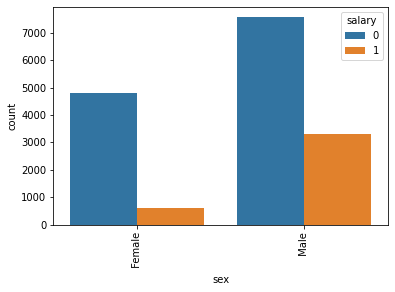

In [46]:
plt.xticks(rotation=90)
sns.countplot(X_train['sex'],hue=y_train['salary'])

In [48]:
 # Use this after the encoding of the data

### Question 2

In [6]:
# TODO

## Data preperation

### Question 1
This dataset hasn’t been cleaned, yet. Do this by finding all the missing values
and handling them. How did you handle these missing values? Clearly explain which
values were missing and how you handled them. Use no more than 100 words.

In [62]:
# TODO

objlist = X_train.select_dtypes(include='object').columns
objlist

Index([], dtype='object')

In [59]:
le = LabelEncoder()

for feature in objlist:
    X_train[feature] = le.fit_transform(X_train[feature])

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16280 non-null  int64  
 1   education-num   16040 non-null  float64
 2   hours-per-week  16280 non-null  int64  
 3   workclass       16280 non-null  int64  
 4   education       16280 non-null  int64  
 5   marital-status  16280 non-null  int64  
 6   occupation      16280 non-null  int64  
 7   relationship    16280 non-null  int64  
 8   race            16280 non-null  int64  
 9   sex             16280 non-null  int64  
 10  native-country  16280 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.4 MB


### Question 2

In [8]:
# TODO

### Question 3

<AxesSubplot:>

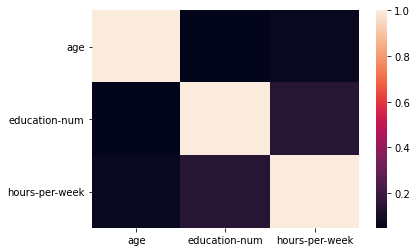

In [47]:
# TODO
sns.heatmap(X_train.corr())

## Experiments

### Question 1

In [10]:
# TODO

### Question 2

In [11]:
# TODO

### Question 3

In [12]:
# TODO

### Question 4

In [13]:
#TODO

### Question 5

In [14]:
#TODO
prediction = np.array([-1] * len(X_test)) #TODO replace this with you own prediction
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_census.txt", index=False, header=False)